In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv(r"C:\Users\USER\Desktop\housing.csv")

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

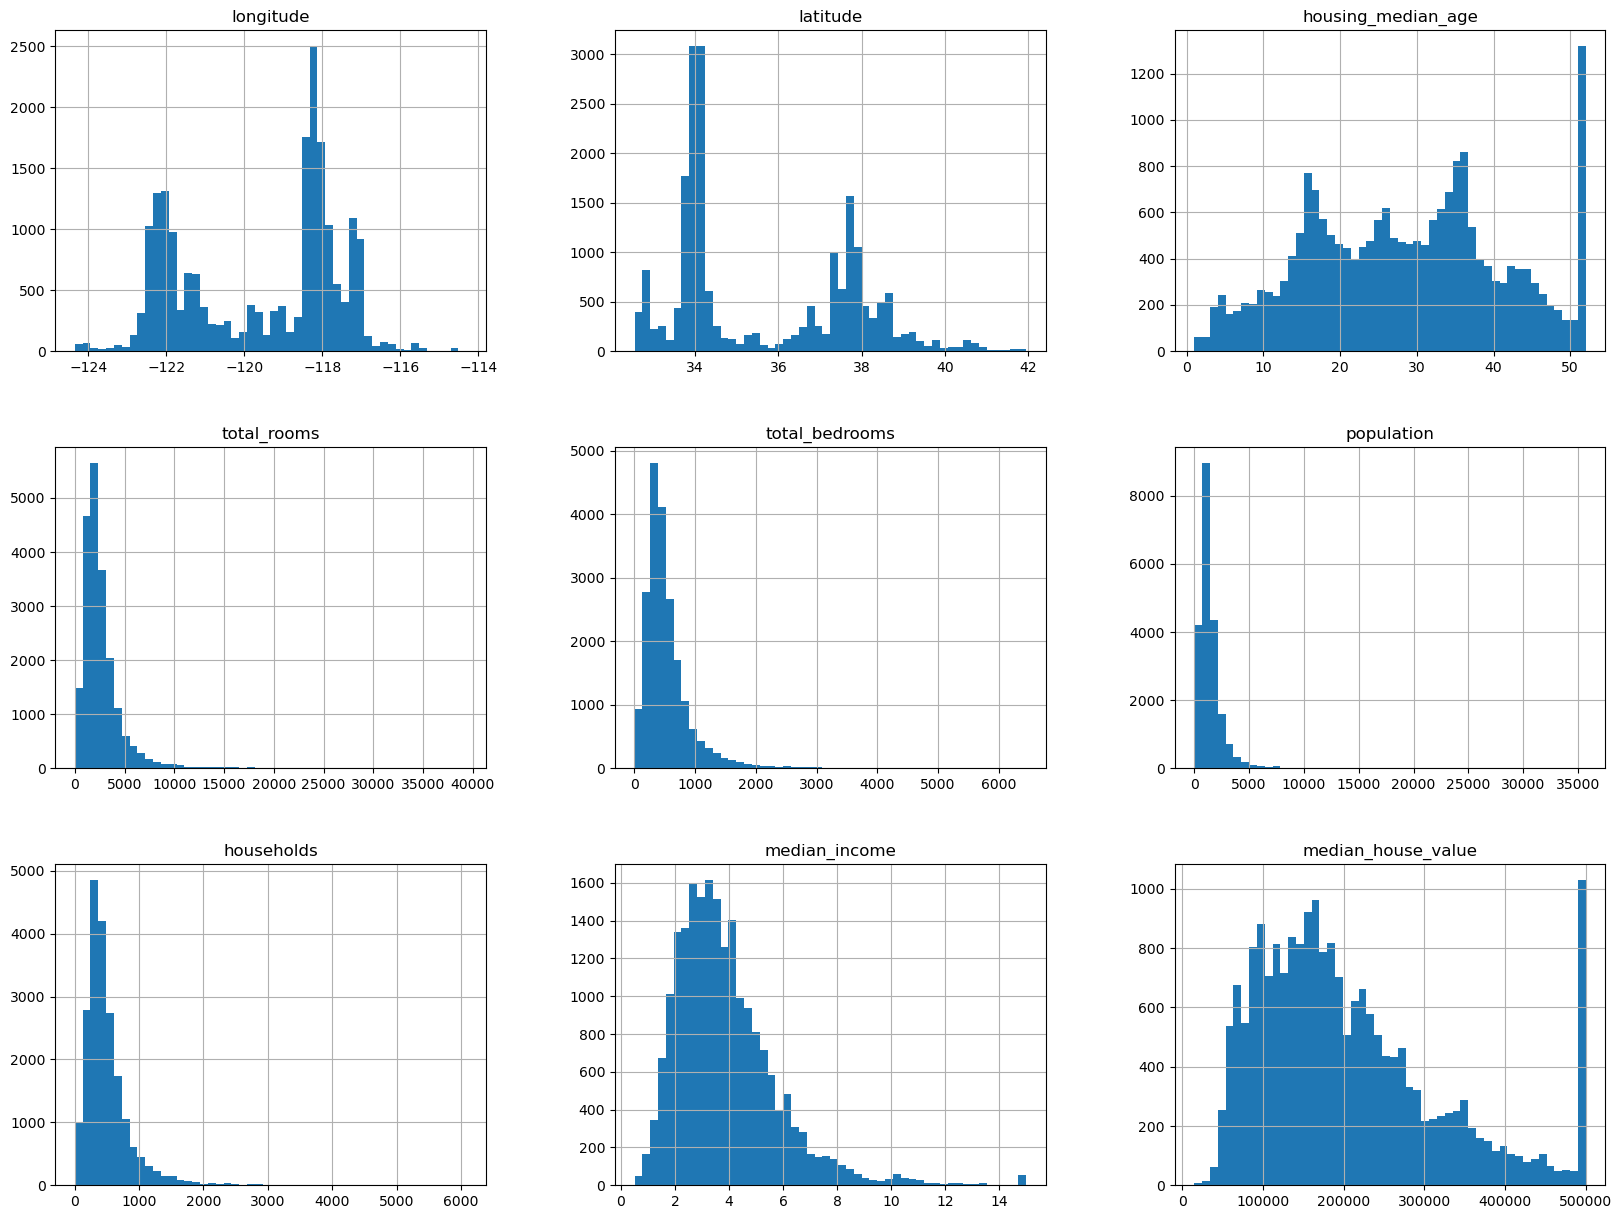

In [8]:
df.hist(bins=50,figsize=(20,15))
plt.show()

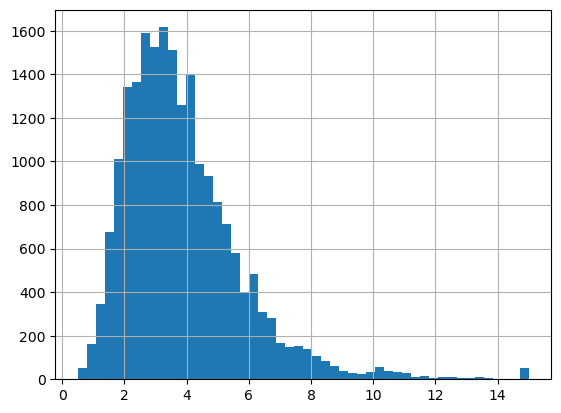

In [9]:
df['median_income'].hist(bins=50)
plt.grid(True)
plt.show()

In [10]:
# Creating a test set
from sklearn.model_selection import train_test_split

In [11]:
train_set,test_set=train_test_split(df,test_size=0.2,random_state=42)

In [12]:
len(train_set)

16512

In [20]:
'''
Assuming median income was a major attribute to the prediction of median income of the housing price
Lets check and see if the test set is representative of the various categories of income

'''

'\nAssuming median income was a major attribute to the prediction of median income of the housing price\nLets check and see if the test set is representative of the various categories of income\n\n'

In [13]:
df['income_cat']=pd.cut(df['median_income'],
                       bins=[0,1.5,3.0,4.5,6,np.inf],
                       labels=[1,2,3,4,5])

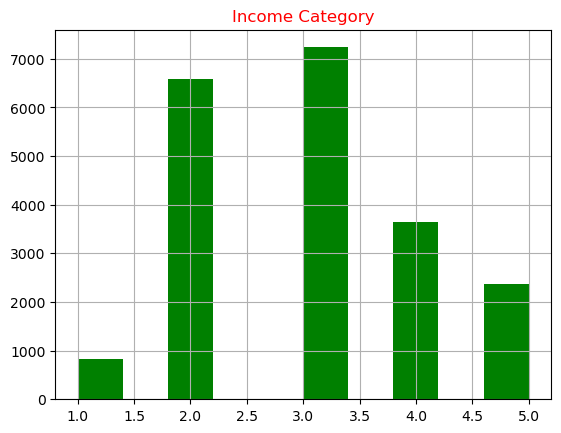

In [14]:
df['income_cat'].hist(color='green')
plt.title('Income Category',color='red')
plt.show()

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit  

In [16]:
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(df,df['income_cat']):
    strat_train_set=df.loc[train_index]
    strat_test_set=df.loc[test_index]

In [17]:
strat_test_set['income_cat'].value_counts()/len(strat_test_set)
# The output below looks exactly identical to the strat_test_set meaning that stratified sampling worked well

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [41]:
len(test_set)

4128

In [18]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True) # Lets drop the income cat so that the data goes back in its original form

In [45]:
# Geographical Visualization

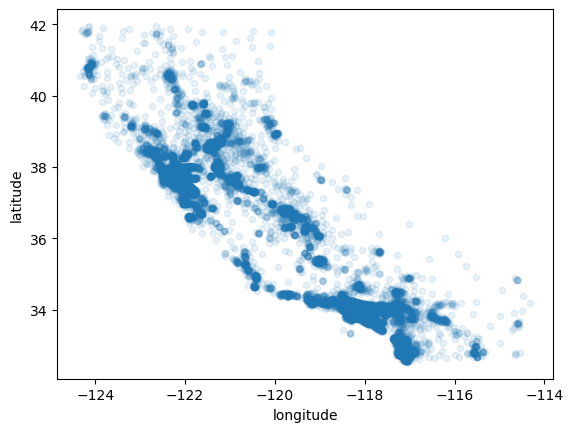

In [19]:
df.plot(y='latitude',x='longitude',kind='scatter',alpha=0.1)
plt.show()

In [49]:
# Lets make it a little bit more clear

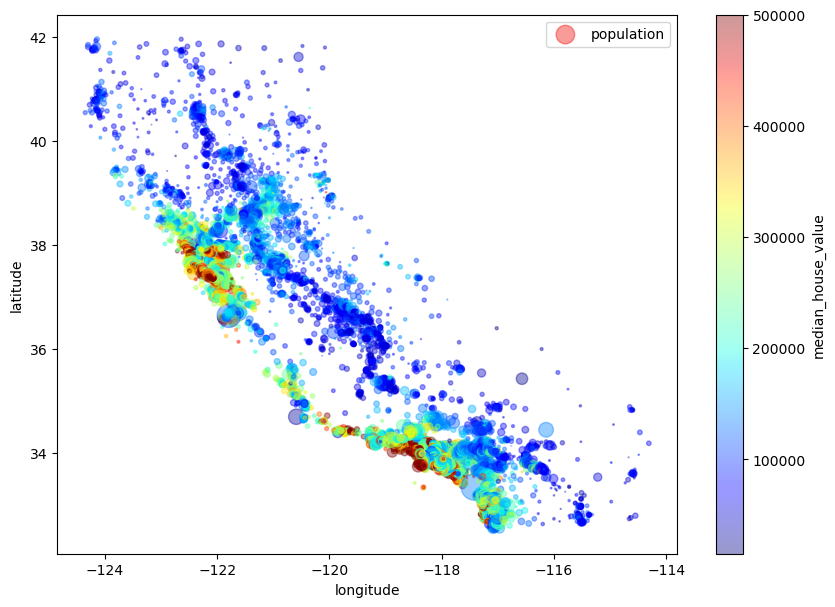

In [20]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
s=df["population"]/100, label="population", figsize=(10,7),
c="median_house_value",cmap=plt.get_cmap("jet"),colorbar=True,
)
plt.legend()

In [58]:
# The above map clearly shows that near ocean prices are very high ,meaning that ocean proximity is also a key 
# Factor in determining housing prices

In [61]:
"""Now lets take a look at the correlation of other features to the housing_prices.
We shall use pearson coeefiecient"""

'Now lets take a look at the correlation of other features to the housing_prices.\nWe shall use pearson coeefiecient'

In [21]:
df_numeric=df.select_dtypes(include=[np.number]) # This selects numeric datatypes only
corr_matrix=df_numeric.corr()

In [22]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [73]:
# Basing on the above median income highly correlates with median house value

In [23]:
# Another way for checking correlation is using the pandas scatter_correlation matrix
from pandas.plotting import scatter_matrix

In [24]:
attributes = ["median_house_value", "median_income", "total_rooms",
"housing_median_age"]

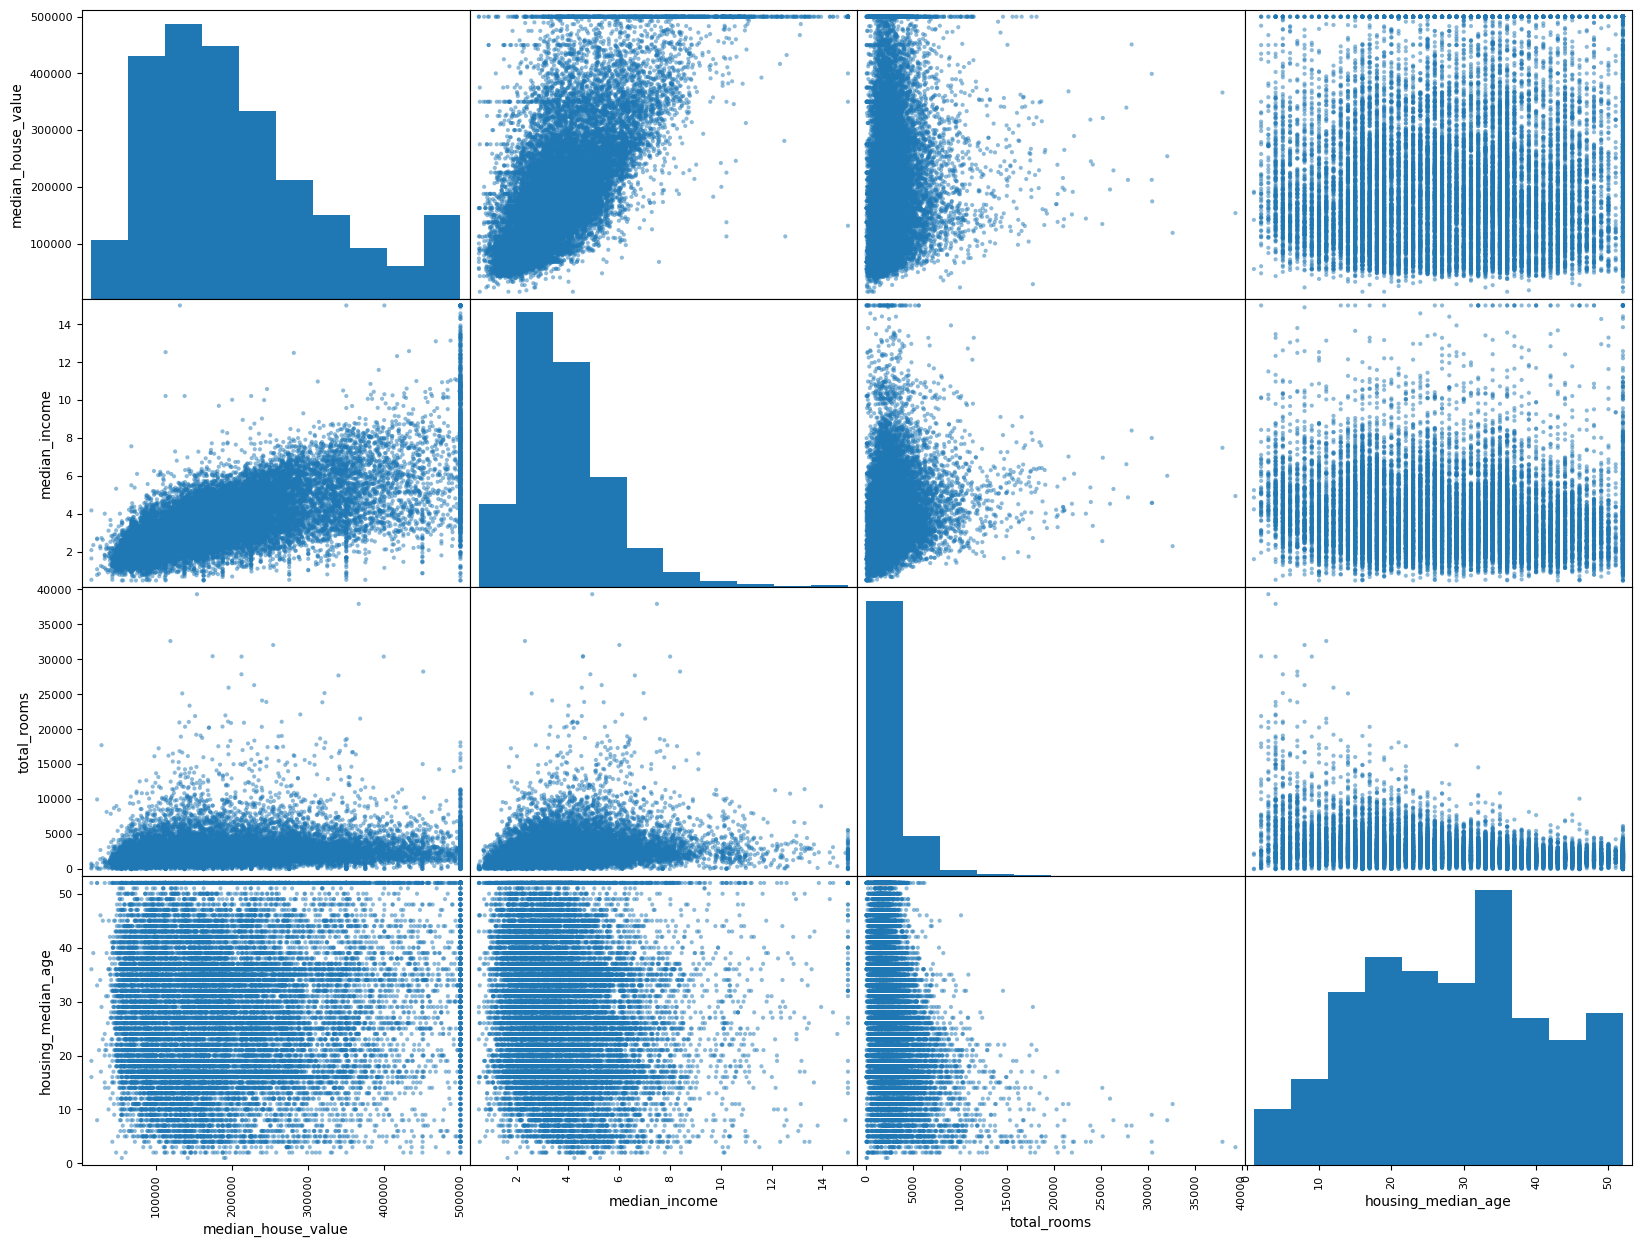

In [25]:
scatter_matrix(df[attributes],figsize=(20,15))
plt.show()

In [80]:
# From the above , the median income loooks to be the most promising lets explore it more

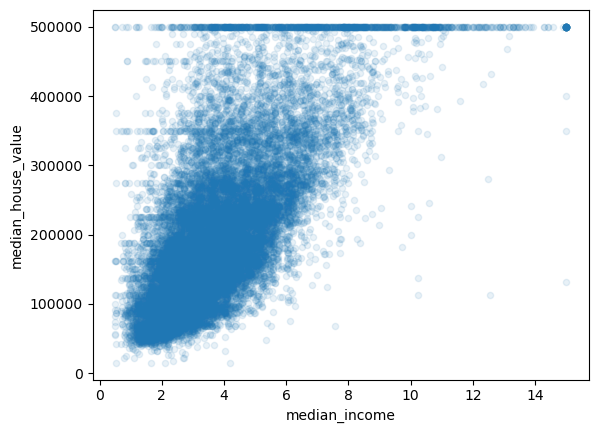

In [26]:
df.plot(kind='scatter',x='median_income',y='median_house_value',alpha=0.1)

plt.show()

In [87]:
# total bedrooms and total households looks too vague ,lets try to see rooms per household

In [27]:
df['rooms_per_household']=df['total_rooms']/df['households']
df['population_per_household']=df['population']/df['households']
df['rooms_per_bedroom']=df['total_bedrooms']/df['total_rooms']

In [28]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [94]:
# Not bad actually rooms per house hold correlates more with median house value

In [97]:
# Now lets prepare the data for the machine learning algorithm

In [29]:
df=strat_train_set.drop('median_house_value',axis=1) # We drop the median_house_value because its our target that we want the model to predict
# Create a copy of the data, this wont affect the strat_set_train
df_labels=strat_train_set['median_house_value'].copy()

In [30]:
# Handling missing values using median to avoid the effect of outliers
from sklearn.impute import SimpleImputer

In [31]:
imputer=SimpleImputer(strategy='median')

In [32]:
df_num=df.drop('ocean_proximity',axis=1) # We are droping ocean proximity because our imputer works on numeric values only

In [36]:
imputer.fit(df_num) # The imputer has now stored median in its statistics_instance variable

,"missing_values missing_values: int, float, str, np.nan, None or pandas.NA, default=np.nanThe placeholder for the missing values. All occurrences of`missing_values` will be imputed. For pandas' dataframes withnullable integer dtypes with missing values, `missing_values`can be set to either `np.nan` or `pd.NA`.",nan
,"strategy strategy: str or Callable, default='mean'The imputation strategy.- If ""mean"", then replace missing values using the mean along each column. Can only be used with numeric data.- If ""median"", then replace missing values using the median along each column. Can only be used with numeric data.- If ""most_frequent"", then replace missing using the most frequent value along each column. Can be used with strings or numeric data. If there is more than one such value, only the smallest is returned.- If ""constant"", then replace missing values with fill_value. Can be used with strings or numeric data.- If an instance of Callable, then replace missing values using the scalar statistic returned by running the callable over a dense 1d array containing non-missing values of each column... versionadded:: 0.20 strategy=""constant"" for fixed value imputation... versionadded:: 1.5 strategy=callable for custom value imputation.",'median'
,"fill_value fill_value: str or numerical value, default=NoneWhen strategy == ""constant"", `fill_value` is used to replace alloccurrences of missing_values. For string or object data types,`fill_value` must be a string.If `None`, `fill_value` will be 0 when imputing numericaldata and ""missing_value"" for strings or object data types.",None
,"copy copy: bool, default=TrueIf True, a copy of X will be created. If False, imputation willbe done in-place whenever possible. Note that, in the following cases,a new copy will always be made, even if `copy=False`:- If `X` is not an array of floating values;- If `X` is encoded as a CSR matrix;- If `add_indicator=True`.",True
,"add_indicator add_indicator: bool, default=FalseIf True, a :class:`MissingIndicator` transform will stack onto outputof the imputer's transform. This allows a predictive estimatorto account for missingness despite imputation. If a feature has nomissing values at fit/train time, the feature won't appear onthe missing indicator even if there are missing values attransform/test time.",False
,"keep_empty_features keep_empty_features: bool, default=FalseIf True, features that consist exclusively of missing values when`fit` is called are returned in results when `transform` is called.The imputed value is always `0` except when `strategy=""constant""`in which case `fill_value` will be used instead... versionadded:: 1.2",False


In [37]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [35]:
df_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [38]:
X=imputer.transform(df_num) # Learnt medians have been applied to the training set

In [39]:
df_tr=pd.DataFrame(X,columns=df_num.columns,index=df_num.index)

In [40]:
df_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964


In [41]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN


In [42]:
strat_test_set.head() # This has the median house value because we want to compare its values with what our model will have learnt from the train set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN
17352,-120.42,34.89,24.0,2020.0,307.0,855.0,283.0,5.0099,162500.0,<1H OCEAN
3505,-118.45,34.25,36.0,1453.0,270.0,808.0,275.0,4.3839,204600.0,<1H OCEAN
7777,-118.10,33.91,35.0,1653.0,325.0,1072.0,301.0,3.2708,159700.0,<1H OCEAN
14155,-117.07,32.77,38.0,3779.0,614.0,1495.0,614.0,4.3529,184000.0,NEAR OCEAN


In [118]:
# Convert ocean proximity to numeric dtype since our ml models understand numbers best compared to text

In [43]:
df_cat=df[['ocean_proximity']]

In [44]:
df_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [45]:
# We shall use one hot encoding 
from sklearn.preprocessing import OneHotEncoder

In [46]:
cat_encoded=OneHotEncoder()

In [47]:
df_cat_encoded=cat_encoded.fit_transform(df_cat)

In [48]:
df_cat_encoded

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>

In [49]:
cat_encoded.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [131]:
# Next lets do feature scalling since our features have different scales forexample median_income and population 

In [60]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
            bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
        housing_extra_attribs = attr_adder.transform(housing.values)


In [72]:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
('imputer', SimpleImputer(strategy="median")),
('attribs_adder', CombinedAttributesAdder()),
('std_scaler', StandardScaler()),
])
df_num_tr = num_pipeline.fit_transform(df_num)

In [73]:
from sklearn.compose import ColumnTransformer

In [63]:
df.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND


In [74]:
num_attribs=['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income']
cat_attribs=['ocean_proximty']

In [79]:
full_pipeline = ColumnTransformer([
("num",num_pipeline,num_attribs),
("cat",OneHotEncoder(),cat_attribs),
])
df_prepared = full_pipeline.fit_transform(df)

ValueError: A given column is not a column of the dataframe

In [77]:
df_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964


In [70]:
cat_attribs

['ocean_proximty']

In [71]:
if hasattr(num_attribs ,'__class__'):
    print(f"  Class : {num_attribs.__class__}")

  Class : <class 'list'>


In [62]:
type(df)

pandas.core.frame.DataFrame

In [67]:
df_prepared.shape

NameError: name 'df_prepared' is not defined